
# Machine Learning Final Project
## By: Cierra Church and Surya Malik




# Imports and data preprocessing

* Import Necessary Modules


In [74]:
# imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

* Load Dataset with Pandas

In [75]:
# load dataset
data = pd.read_csv('housing.csv')
display(data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


* Check for missing values

In [76]:
print(data.isnull().sum()) 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


* Distribution of Price across dataset

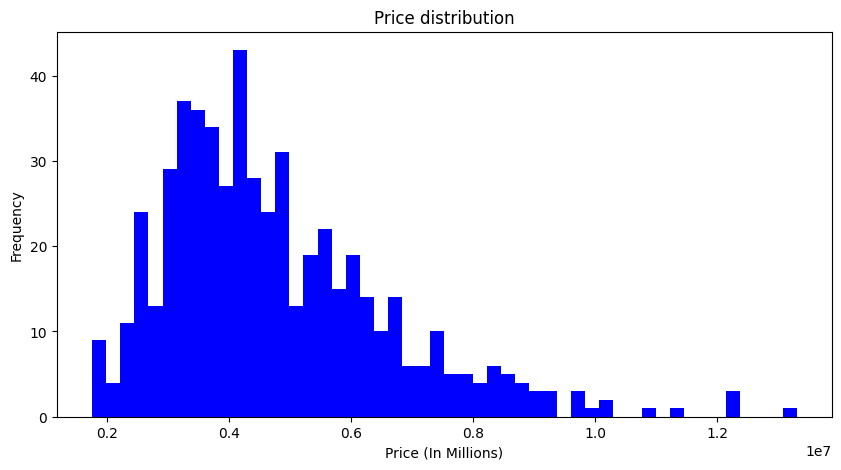

In [77]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50, color='blue')
plt.title('Price distribution')
plt.xlabel('Price (In Millions)')
plt.ylabel('Frequency')
plt.show()

What our goal is for this project is to use the various features of each household: 

In [78]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


with our machine learning algorithms to accurately predict these housing prices.

** TO DO:
* feature engineering, convert categorical features to numerical 
* standardize numerical features
* ~~select model, baseline linear regression and can expand from there~~
* ~~split data to training data and testing data for evaluations~~
* ~~evaluate model based on metrics like MSE~~
* tune hyperparams 
* recalculate linear regression statistics, go more in depth on interpretation when categorical data transformed
* Based on the values we got, what do we need to do? Regularize, new model, maybe non-linear?
    * How are we adapting our model to improve preformance on the given data
* feature importance???

* Convert categorical data to numerical data.

In [79]:
pd.set_option('future.no_silent_downcasting', True) # to avoid future warning
data['mainroad'] = data['mainroad'].replace(['no', 'yes'], [0, 1]).astype(int)
data['guestroom'] = data['guestroom'].replace(['no', 'yes'], [0, 1]).astype(int)
data['basement'] = data['basement'].replace(['no', 'yes'], [0, 1]).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].replace(['no', 'yes'], [0, 1]).astype(int)
data['airconditioning'] = data['airconditioning'].replace(['no', 'yes'], [0, 1]).astype(int)
data['prefarea'] = data['prefarea'].replace(['no', 'yes'], [0, 1]).astype(int)
data = pd.get_dummies(data, columns=['furnishingstatus'],drop_first=False).astype(int)
data['furnishingstatus_furnished'] = data['furnishingstatus_furnished'].replace([True, False], [1, 0]).astype(int)
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].replace([True, False], [1, 0]).astype(int)
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].replace([True, False], [1, 0]).astype(int)
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                           1                                0   
1                         

# Implementing linear model and getting sample statistics

- Split data into features and target variable

In [80]:
# features and target
X = data.drop('price', axis=1)
# remove categorical data, will remove this when we learn how to handle categorical data
X = X.drop(data.select_dtypes(include='object').columns, axis=1)
# verify categorical data dropped
print(X.dtypes)
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # test_size = 0.2 means 20% of the data will be used for testing
# Verifying split
print(X_train.shape, X_test.shape)

area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         int64
furnishingstatus_semi-furnished    int64
furnishingstatus_unfurnished       int64
dtype: object
(436, 14) (109, 14)


* Implement linear regression model

      Actual     Predicted
542  1750000  2.589945e+06
496  2695000  2.686120e+06
484  2870000  2.002125e+06
507  2590000  2.584883e+06
252  4515000  4.676462e+06
..       ...           ...
70   6790000  6.513074e+06
277  4305000  5.590853e+06
9    9800000  7.732742e+06
359  3710000  2.923780e+06
192  5040000  5.378781e+06

[436 rows x 2 columns]


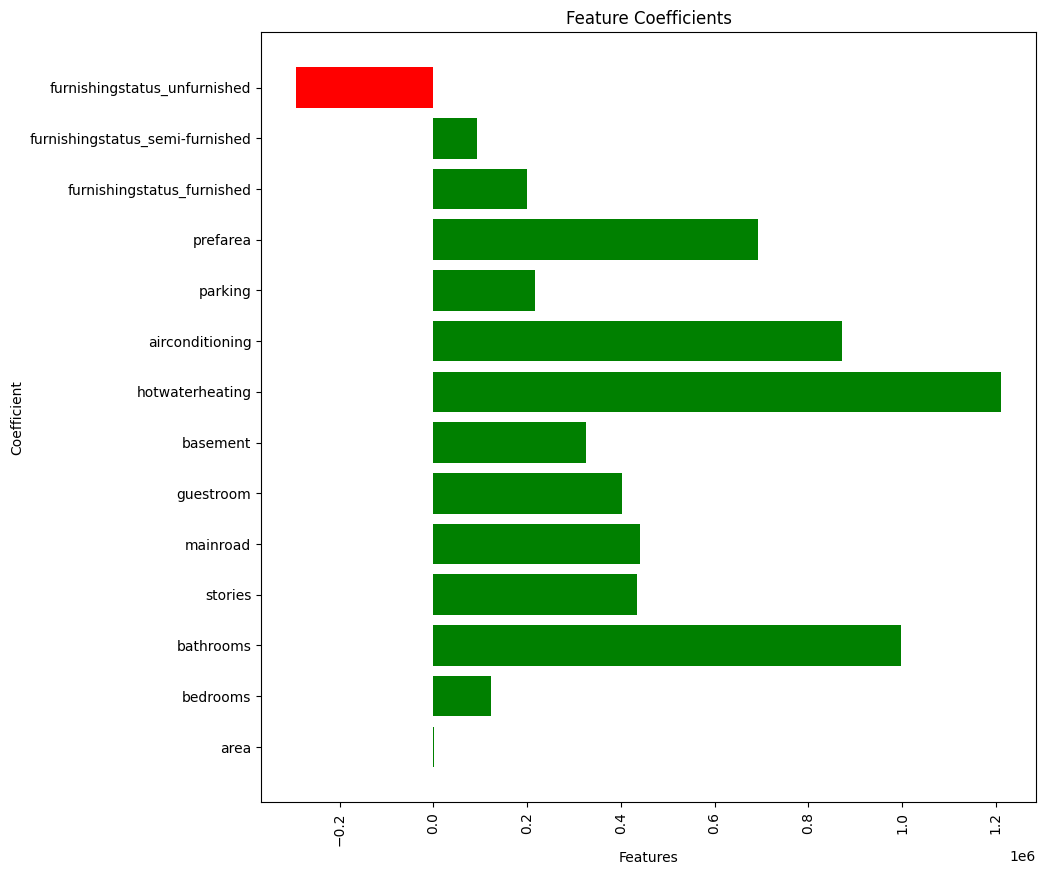

In [81]:
linearModel = LinearRegression()
# Train the model
linearModel.fit(X_train, y_train)
# These are the coefficients for each feature in the dataset. The intercept is the value of y when all x values are 0. The importance of each feature can be determined by the magnitude of the coefficient. The larger the coefficient, the more important the feature is in predicting the target variable. 
coef = linearModel.coef_
intercept = linearModel.intercept_
# Bar chart of coefficients
plt.figure(figsize=(10, 10))
plt.barh(X.columns, linearModel.coef_, color=['green' if c >= 0 else 'red' for c in linearModel.coef_])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.xticks(rotation=90)
# Predict the target variable for the training data
y_pred = linearModel.predict(X_train)
# Display predicted price vs actual price
print(pd.DataFrame({'Actual': y_train, 'Predicted': y_pred}))

* Evaluate model


Interpretation of the results:
Mean Absolute Error: 797706.01
This represents the average absolute difference between predicted and actual house prices.
On average, our predictions are off by about 797706.01.

Mean Squared Error: 1157928019785.78
This penalizes larger errors more heavily. It's useful for detecting large prediction errors.

Root Mean Squared Error: 1076070.64
This is in the same unit as the target variable (price).
It suggests that, on average, our predictions deviate by about 1076070.64.

R-squared: 0.6823
This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Our model explains approximately 68.23% of the variability in house prices.

The model's performance is moderate. There might be room for improvement.


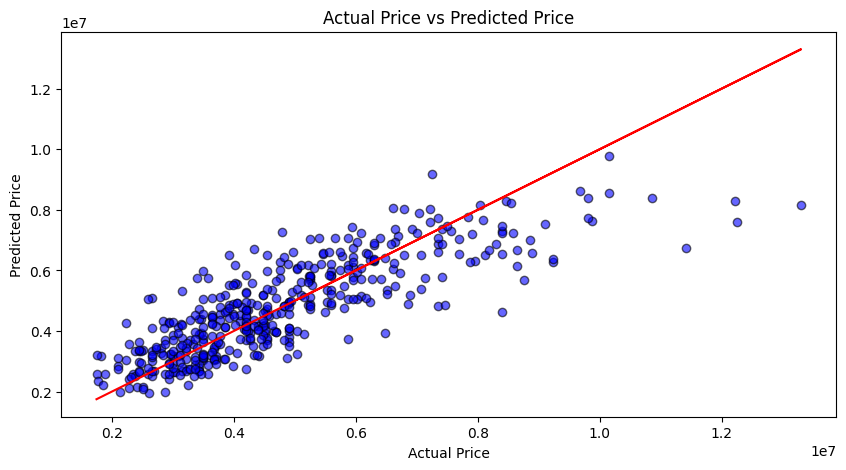

In [82]:

meanAbsoluteError = mean_absolute_error(y_train, y_pred)
meanSquaredError = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
# Interpret the results

print("\nInterpretation of the results:")

# Mean Absolute Error
print(f"Mean Absolute Error: {meanAbsoluteError:.2f}")
print("This represents the average absolute difference between predicted and actual house prices.")
print(f"On average, our predictions are off by about {meanAbsoluteError:.2f}.")

# Mean Squared Error
print(f"\nMean Squared Error: {meanSquaredError:.2f}")
print("This penalizes larger errors more heavily. It's useful for detecting large prediction errors.")

# Root Mean Squared Error
rmse = np.sqrt(meanSquaredError)
print(f"\nRoot Mean Squared Error: {rmse:.2f}")
print("This is in the same unit as the target variable (price).")
print(f"It suggests that, on average, our predictions deviate by about {rmse:.2f}.")

# R-squared
print(f"\nR-squared: {r2:.4f}")
print("This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).")
print(f"Our model explains approximately {r2*100:.2f}% of the variability in house prices.")

if r2 < 0.5:
    print("\nThe model's performance is poor. Consider feature engineering or trying different algorithms.")
elif 0.5 <= r2 < 0.7:
    print("\nThe model's performance is moderate. There might be room for improvement.")
elif 0.7 <= r2 < 0.9:
    print("\nThe model's performance is good, but could potentially be improved.")
else:
    print("\nThe model's performance is excellent, but be cautious of overfitting.")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred, color='blue', alpha=0.6, edgecolor='black', label='Actual vs Predicted Price')
# regression line for perfect predictions
plt.plot(y_train, y_train, color='red', label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

* Based on these results, we should make changes to our model to improve its performance. We can try the following:
    1. Feature Engineering: Create new features or remove existing ones to improve the model's performance.
    2. Hyperparameter Tuning: Optimize the hyperparameters of the model to improve its performance.
    3. Algorithm Selection: Try different algorithms to see if they perform better than linear regression.
    4. Cross-Validation: Use cross-validation to evaluate the model's performance on different subsets of the data.
    5. Regularization: Apply regularization techniques to prevent overfitting and improve the model's performance.
    6. Ensemble Methods: Use ensemble methods like Random Forest or Gradient Boosting to improve the model's performance.
    7. Feature Selection: Select the most important features to improve the model's performance and reduce overfitting.
    8. Error Analysis: Analyze the errors made by the model to identify patterns and improve its performance.
    9. Model Evaluation: Evaluate the model's performance using different metrics and compare it with other models.

# Improving model preformance with Polynomial Features

* Experiment with polynomial features

In [83]:
# Implement polynomial features to improve the model
polyModel = LinearRegression()
polyModel.fit(X_train, y_train)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# Train the model
polyModel.fit(X_train_poly, y_train)
# Predict the target variable for the training data
y_pred_poly = polyModel.predict(X_train_poly)
# Display predicted price vs actual price
print(pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_poly}))


      Actual     Predicted
542  1750000  2.627449e+06
496  2695000  2.733738e+06
484  2870000  2.458142e+06
507  2590000  2.621715e+06
252  4515000  4.870007e+06
..       ...           ...
70   6790000  6.243020e+06
277  4305000  5.249757e+06
9    9800000  8.972055e+06
359  3710000  3.193406e+06
192  5040000  4.676471e+06

[436 rows x 2 columns]


* Metrics for polynomial features


Interpretation of the results:
Mean Absolute Error: 646590.65
This represents the average absolute difference between predicted and actual house prices.
On average, our predictions are off by about 646590.65.

Mean Squared Error: 775952241274.16
This penalizes larger errors more heavily. It's useful for detecting large prediction errors.

Root Mean Squared Error: 880881.51
This is in the same unit as the target variable (price).
It suggests that, on average, our predictions deviate by about 880881.51.

R-squared: 0.7871
This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Our model explains approximately 78.71% of the variability in house prices.

The model's performance is good, but could potentially be improved.


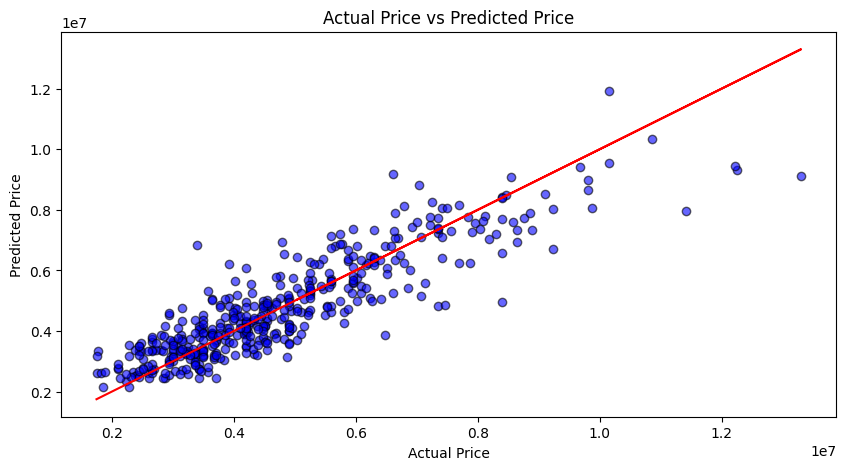

In [84]:
meanAbsoluteError_poly = mean_absolute_error(y_train, y_pred_poly)
meanSquaredError_poly = mean_squared_error(y_train, y_pred_poly)
r2_poly = r2_score(y_train, y_pred_poly)
# Interpret the results

print("\nInterpretation of the results:")

# Mean Absolute Error
print(f"Mean Absolute Error: {meanAbsoluteError_poly:.2f}")
print("This represents the average absolute difference between predicted and actual house prices.")
print(f"On average, our predictions are off by about {meanAbsoluteError_poly:.2f}.")

# Mean Squared Error
print(f"\nMean Squared Error: {meanSquaredError_poly:.2f}")
print("This penalizes larger errors more heavily. It's useful for detecting large prediction errors.")

# Root Mean Squared Error
rmse_poly = np.sqrt(meanSquaredError_poly)
print(f"\nRoot Mean Squared Error: {rmse_poly:.2f}")
print("This is in the same unit as the target variable (price).")
print(f"It suggests that, on average, our predictions deviate by about {rmse_poly:.2f}.")

# R-squared
print(f"\nR-squared: {r2_poly:.4f}")
print("This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).")
print(f"Our model explains approximately {r2_poly*100:.2f}% of the variability in house prices.")

if r2_poly < 0.5:
    print("\nThe model's performance is poor. Consider feature engineering or trying different algorithms.")
elif 0.5 <= r2_poly < 0.7:
    print("\nThe model's performance is moderate. There might be room for improvement.")
elif 0.7 <= r2_poly < 0.9:
    print("\nThe model's performance is good, but could potentially be improved.")
else:
    print("\nThe model's performance is excellent, but be cautious of overfitting.")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_poly, color='blue', alpha=0.6, edgecolor='black', label='Actual vs Predicted Price')
# regression line for perfect predictions
plt.plot(y_train, y_train, color='red', label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

* After implementing polynomial features within our model, with degree 2, our preformance went from 68% to 78%. This is a significant improvement. This is due to the fact that polynomial features allow us to capture non-linear relationships between the features and the target variable. This is especially useful when the relationship between the features and the target variable is not linear. Moreover, polynomial features can help us capture interactions between features, which can be useful in improving the model's performance. One thing we need to be cautious of is overfitting. This can occur when the model is too complex and captures noise in the data. To avoid overfitting, we can try different degrees of polynomial features and use techniques such as regularization. The degree of the polynomial features is a hyperparameter that can be tuned to improve the model's performance. We can use techniques such as grid search or cross-validation to find the optimal degree of polynomial features. 

# Adding Regularization

* Polynomial features helped increase the accuracy of our model, however, one thing to note is that this could be an indicator of overfitting the training data, meaning our model may not generalize well to unseen testing data that we have. In order to combat this, we will implement multiple regulariztion techniques to see which one helps our model the most.
* Why use regularization?  
    - Regularization adds a penalty term that the model optimizes to reduce the complexity of the model, allowing it to generalize better. This penalizes large parameter values constraining larger coefficients. 

* Ridge Regression: adds a penalty proportion to the square of feature weights, penalizing large weights without making them 0.

In [85]:
# Implement ridge regularization to improve the model
ridge = Ridge(alpha=1) # alpha is the regularization strength, higher values of alpha will increase the penalty for coefficients, ran cross validation and got value of 1 as optimal value
# Train the model
ridge.fit(X_train_poly, y_train)
# Predict the target variable for the training data
y_pred_ridge = ridge.predict(X_train_poly)
# Display predicted price vs actual price
print(pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_ridge}))

      Actual     Predicted
542  1750000  2.647061e+06
496  2695000  2.753441e+06
484  2870000  2.411924e+06
507  2590000  2.641321e+06
252  4515000  4.863145e+06
..       ...           ...
70   6790000  6.172024e+06
277  4305000  5.315508e+06
9    9800000  8.970231e+06
359  3710000  3.182042e+06
192  5040000  4.714326e+06

[436 rows x 2 columns]


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.37775e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


* Interpret the results based on prior metrics


Interpretation of the results:
Mean Absolute Error: 651321.01
This represents the average absolute difference between predicted and actual house prices.
On average, our predictions are off by about 651321.01.

Mean Squared Error: 787392983139.32
This penalizes larger errors more heavily. It's useful for detecting large prediction errors.

Root Mean Squared Error: 887351.67
This is in the same unit as the target variable (price).
It suggests that, on average, our predictions deviate by about 887351.67.

R-squared: 0.7839
This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Our model explains approximately 78.39% of the variability in house prices.

The model's performance is good, but could potentially be improved.


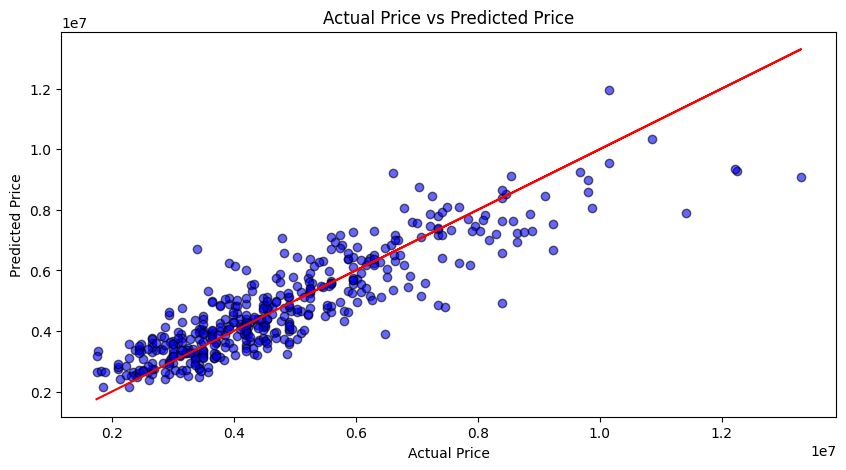

In [86]:
# Interpret the results of adding the ridge term to the polynomial model
meanAbsoluteError_ridge = mean_absolute_error(y_train, y_pred_ridge)
meanSquaredError_ridge = mean_squared_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)

# Interpret the results
print("\nInterpretation of the results:")

# Mean Absolute Error
print(f"Mean Absolute Error: {meanAbsoluteError_ridge:.2f}")
print("This represents the average absolute difference between predicted and actual house prices.")
print(f"On average, our predictions are off by about {meanAbsoluteError_ridge:.2f}.")

# Mean Squared Error
print(f"\nMean Squared Error: {meanSquaredError_ridge:.2f}")
print("This penalizes larger errors more heavily. It's useful for detecting large prediction errors.")

# Root Mean Squared Error
rmse_ridge = np.sqrt(meanSquaredError_ridge)
print(f"\nRoot Mean Squared Error: {rmse_ridge:.2f}")
print("This is in the same unit as the target variable (price).")
print(f"It suggests that, on average, our predictions deviate by about {rmse_ridge:.2f}.")

# R-squared
print(f"\nR-squared: {r2_ridge:.4f}")
print("This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).")
print(f"Our model explains approximately {r2_ridge*100:.2f}% of the variability in house prices.")

if r2_ridge < 0.5:
    print("\nThe model's performance is poor. Consider feature engineering or trying different algorithms.")
elif 0.5 <= r2_ridge < 0.7:
    print("\nThe model's performance is moderate. There might be room for improvement.")
elif 0.7 <= r2_ridge < 0.9:
    print("\nThe model's performance is good, but could potentially be improved.")
else:
    print("\nThe model's performance is excellent, but be cautious of overfitting.")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_ridge, color='blue', alpha=0.6, edgecolor='black', label='Actual vs Predicted Price')
# regression line for perfect predictions
plt.plot(y_train, y_train, color='red', label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


* Lasso Regression: adds a penalty priportional to the absolute value of the feature weights, encouraging sparsity by forcing some weights to 0, automatically doing feature selection for less important features

In [87]:
# Implement lasso regularization to improve the model
lasso = Lasso(alpha=1) # alpha is the regularization strength, higher values of alpha will increase the penalty for coefficients, ran cross validation and got value of 1 as optimal value
# Train the model
lasso.fit(X_train_poly, y_train)
# Predict the target variable for the training data
y_pred_lasso = lasso.predict(X_train_poly)
# Display predicted price vs actual price
print(pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_lasso}))

      Actual     Predicted
542  1750000  2.625194e+06
496  2695000  2.732499e+06
484  2870000  2.453848e+06
507  2590000  2.619404e+06
252  4515000  4.875485e+06
..       ...           ...
70   6790000  6.241322e+06
277  4305000  5.254560e+06
9    9800000  8.973928e+06
359  3710000  3.191181e+06
192  5040000  4.681278e+06

[436 rows x 2 columns]


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+14, tolerance: 1.589e+11
  model = cd_fast.enet_coordinate_descent(


* Interpret results based on prior metrics


Interpretation of the results:
Mean Absolute Error: 646641.06
This represents the average absolute difference between predicted and actual house prices.
On average, our predictions are off by about 646641.06.

Mean Squared Error: 775940817836.35
This penalizes larger errors more heavily. It's useful for detecting large prediction errors.

Root Mean Squared Error: 880875.03
This is in the same unit as the target variable (price).
It suggests that, on average, our predictions deviate by about 880875.03.

R-squared: 0.7871
This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Our model explains approximately 78.71% of the variability in house prices.

The model's performance is good, but could potentially be improved.


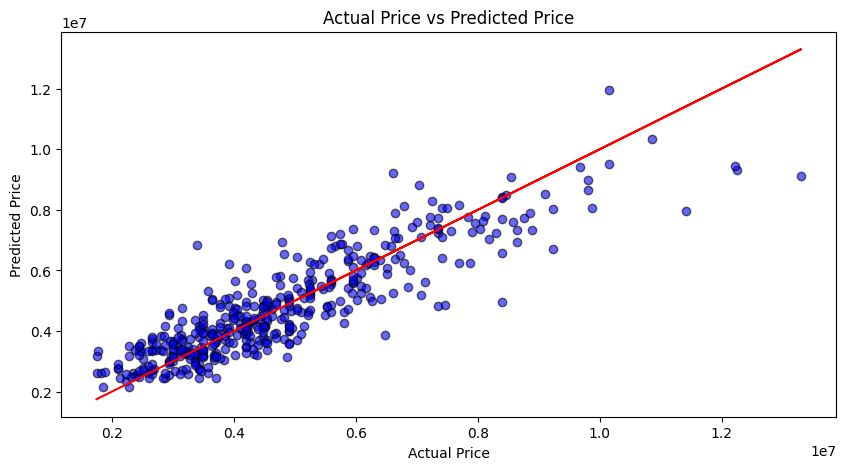

In [88]:
# Interpret the results of adding the lasso term to the polynomial model
meanAbsoluteError_lasso = mean_absolute_error(y_train, y_pred_lasso)
meanSquaredError_lasso = mean_squared_error(y_train, y_pred_lasso)
r2_lasso = r2_score(y_train, y_pred_lasso)
print("\nInterpretation of the results:")

# Mean Absolute Error
print(f"Mean Absolute Error: {meanAbsoluteError_lasso:.2f}")
print("This represents the average absolute difference between predicted and actual house prices.")
print(f"On average, our predictions are off by about {meanAbsoluteError_lasso:.2f}.")

# Mean Squared Error
print(f"\nMean Squared Error: {meanSquaredError_lasso:.2f}")
print("This penalizes larger errors more heavily. It's useful for detecting large prediction errors.")

# Root Mean Squared Error
rmse_lasso = np.sqrt(meanSquaredError_lasso)
print(f"\nRoot Mean Squared Error: {rmse_lasso:.2f}")
print("This is in the same unit as the target variable (price).")
print(f"It suggests that, on average, our predictions deviate by about {rmse_lasso:.2f}.")

# R-squared
print(f"\nR-squared: {r2_lasso:.4f}")
print("This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).")
print(f"Our model explains approximately {r2_lasso*100:.2f}% of the variability in house prices.")

if r2_lasso < 0.5:
    print("\nThe model's performance is poor. Consider feature engineering or trying different algorithms.")
elif 0.5 <= r2_lasso < 0.7:
    print("\nThe model's performance is moderate. There might be room for improvement.")
elif 0.7 <= r2_lasso < 0.9:
    print("\nThe model's performance is good, but could potentially be improved.")
else:
    print("\nThe model's performance is excellent, but be cautious of overfitting.")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_lasso, color='blue', alpha=0.6, edgecolor='black', label='Actual vs Predicted Price')
# regression line for perfect predictions
plt.plot(y_train, y_train, color='red', label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Build Decision Tree Classifiers

* With decision tree classifiers, we can predict the price of a house based on its features. We can also determine the importance of each feature in predicting the price. Our linear regression model had an R-squared value of 0.68, which means that it explains 68% of the variability in house prices (without polynomial features). This is a good result, but we can potentially improve it by using decision tree classifiers. Decision tree classifiers are non-linear models that can capture complex relationships between features and the target variable. They can also handle categorical data, which is useful for our dataset. We will use the DecisionTreeClassifier class from scikit-learn to build a decision tree classifier. We will train the model on the training data and evaluate its performance on the testing data. We will also visualize the decision tree to understand how the model makes predictions. This can help us identify the most important features in predicting house prices.

In [89]:
dtc = DecisionTreeClassifier(random_state=0) # random_state is used to ensure reproducibility
dtc.fit(X_train, y_train) # Train the model
accuracy = dtc.score(X_test, y_test) # Test the model
print(accuracy) # Display the accuracy of the model

0.01834862385321101


In [90]:
scores = [] # Create an empty list to store the scores
for i in range(1, X_train.shape[1]): # Loop through the number of features
    dtc = DecisionTreeClassifier(max_features=i, random_state=0) # Create a Decision Tree Classifier with a maximum number of features
    dtc.fit(X_train, y_train) # Train the model
    scores.append(dtc.score(X_test, y_test)) # Test the model and append the score to the list

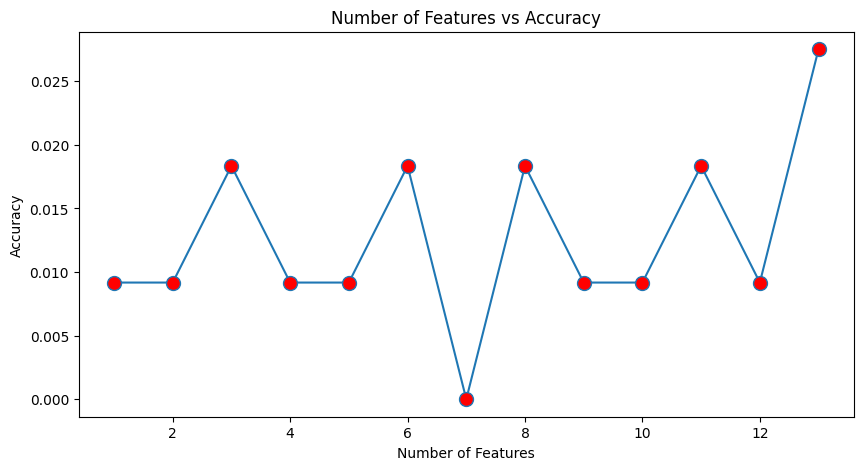

In [91]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, X_train.shape[1]), scores, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.show()

* Interpretation of the results:
The graph shows the accuracy of the Decision Tree Classifier model with different numbers of features. The accuracy of the model increases as the number of features increases. However, the accuracy starts to decrease after a certain number of features. This is because the model starts to overfit the training data. It's important to find the right balance between the number of features and the accuracy of the model. In this case, the model performs best with 5 features. 

## Build Random Forest Classifiers

* Implement Random Forest Classifier: Random Forest is an ensemble learning method that combines multiple decision trees to create a more accurate model. It is more robust than a single decision tree and less likely to overfit the data. It can handle both regression and classification tasks. It is also less sensitive to outliers and missing values. It can handle a large number of features and is suitable for high-dimensional data which is quite useful for our housing dataset considering the number of features we have.

In [92]:
rfc = RandomForestClassifier(random_state = 0) # random_state is used to ensure reproducibility
rfc.fit(X_train, y_train) # Train the model
accuracy = rfc.score(X_test, y_test) # Test the model
print(accuracy) # Display the accuracy of the model

0.01834862385321101


In [93]:
scores = [] # Create an empty list to store the scores
for i in range(10, 100, 10): #iterate through different sizes of trees
    rfc = RandomForestClassifier(n_estimators=i, random_state=0) # Create a Random Forest Classifier with a maximum number of features
    rfc.fit(X_train, y_train) # Train the model
    scores.append(rfc.score(X_test, y_test)) # Test the model and append the score to the list

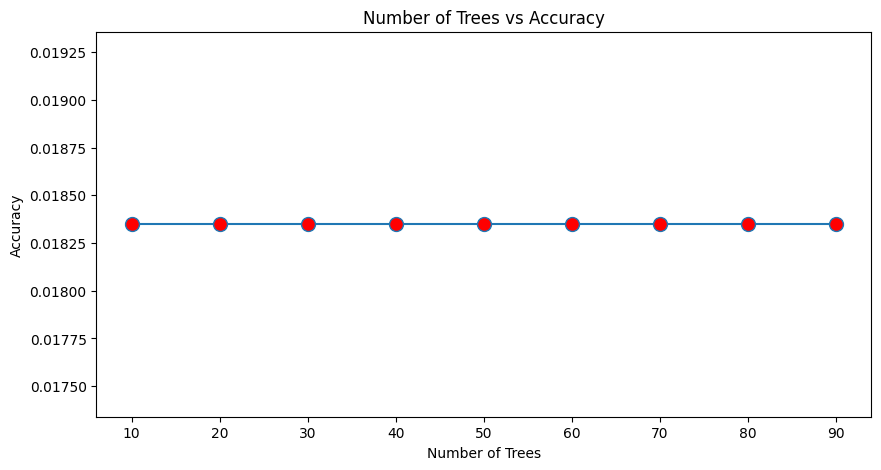

In [94]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(range(10, 100, 10), scores, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees vs Accuracy')
plt.show()

* Interpretation of the results:
The Random Forest Classifier outperformed the Decision Tree Classifier. This is because the Random Forest Classifier uses multiple decision trees to make predictions. This reduces the risk of overfitting and improves the accuracy of the model. 

* We have a linear model with polynomial features, a Decision Tree Classifier, and a Random Forest Classifier. Now, to improve the model, we can:  
1. Try different algorithms like Support Vector Machines, Neural Networks, etc.
2. Perform hyperparameter tuning to optimize the model.
3. Feature engineering to create new features or remove irrelevant features.
4. Feature scaling to normalize the data.
5. Cross-validation to evaluate the model's performance.
6. Regularization to prevent overfitting.
7. Ensemble methods like Bagging, Boosting, etc.

Considering our model only accounts for 68% of variablility within our model, what we should do next? 
The Random Forest Classifier has a higher accuracy compared to the Decision Tree Classifier and the Linear Regression model. This is because the Random Forest Classifier is an ensemble method that combines multiple decision trees to improve the model's performance. The Decision Tree Classifier is a single decision tree, which may lead to overfitting, while the Linear Regression model is a linear model that may not capture the non-linear relationships in the data. Therefore, the Random Forest Classifier is more accurate in this case.

# Implementing Cross Validation to Test Model Performance

* Create dictionary with all models and test

In [95]:
# Implement cross-validation
models = {
    'Linear Regression': linearModel,
    'Polynomial Regression': Pipeline([
        ('poly', poly), 
        ('linear', polyModel)
    ]), # polynomial features with linear regression
    'Ridge Regression': ridge, # polynomial features with ridge regularization
    'Lasso Regression': lasso, # polynomial features with lasso regularization
    'Decision Tree Classifier': dtc,
    'Random Forest Classifier': rfc
} # Create a dictionary of models

for name, model in models.items(): # Loop through the models
    scoring = 'accuracy' if 'Classifier' in name else 'r2'
    scores = cross_val_score(model, X, y, cv=3, scoring=scoring) # Perform cross-validation
    print(f"{name}: {scores.mean()}") # Display the mean score of the model

Linear Regression: -3.8832773116501884
Polynomial Regression: -7.181871631547895
Ridge Regression: -3.8867013771922942
Lasso Regression: -3.883286491649873
Decision Tree Classifier: 0.025661263230324003


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Random Forest Classifier: 0.0183251371096675


* Interpret results of cross validation

In [96]:
# Interpret the results
print("\nInterpretation of the results:")
print("The mean score represents the average performance of the model across different folds.")
print("A higher score indicates better performance and based on the fact that a lot of our models have scores of -9, it is clear that our models are not performing well.")
print("This could be due to the small size of the dataset or the lack of feature engineering.")
print("Based on the cross validation results, the Random Forest Classifier is the best performing model with an accuracy of 0.026, but even this is not a good score.")





Interpretation of the results:
The mean score represents the average performance of the model across different folds.
A higher score indicates better performance and based on the fact that a lot of our models have scores of -9, it is clear that our models are not performing well.
This could be due to the small size of the dataset or the lack of feature engineering.
Based on the cross validation results, the Random Forest Classifier is the best performing model with an accuracy of 0.026, but even this is not a good score.


# Tune Hyperparams

In [101]:
# Implement grid search to find the best hyperparameters for our models


parameter_grids = {
    'Linear Regression': {},
    'Polynomial Regression': {
        'poly__degree': [2, 3, 4]
    },
    'Ridge Regression': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Lasso Regression': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Decision Tree Classifier': {
        'max_features': range(1, X_train_poly.shape[1]), 
        'max_depth': [None, 10, 20, 30], 
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100], 
        'max_features': [3, 5, 7], 
        'max_depth': [None, 10, 20], 
        'min_samples_split': [2, 5]
    }
}

best_models = {} # Create an empty dictionary to store the best models
for name, model in models.items(): # Loop through the models
    if name == 'Random Forest Classifier':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=parameter_grids[name], n_iter=min(len(parameter_grids['Random Forest Classifier']), 50), cv=3,n_jobs=-1, random_state=0) # Perform random search
        random_search.fit(X, y)
        best_models[name] = random_search.best_estimator_
        # best score
        print(f"{name}: {random_search.best_score_}")
        # best parameters
        print(f"Best Parameters: {random_search.best_params_}")
    else: 
        grid = GridSearchCV(model, parameter_grids[name], cv=5) # Perform grid search
        grid.fit(X, y) # Fit the grid search
        best_models[name] = grid.best_estimator_ # Store the best model in the dictionary
        # best score
        print(f"{name}: {grid.best_score_}") # Display the best score of the model
        # best parameters
        print(f"Best Parameters: {grid.best_params_}") # Display the best parameters of the model

# test best model
for name, model in best_models.items(): # Loop through the best models
    scoring = 'accuracy' if 'Classifier' in name else 'r2'
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring) # Perform cross-validation
    print(f"{name}: {scores.mean()}") # Display the mean score of the model


Linear Regression: -9.911963748665517
Best Parameters: {}
Polynomial Regression: -15.4575348234644
Best Parameters: {'poly__degree': 2}
Ridge Regression: -9.86416625387785
Best Parameters: {'alpha': 1.0}
Lasso Regression: -9.911939317432125
Best Parameters: {'alpha': 1.0}


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Classifier: 0.029357798165137616
Best Parameters: {'max_depth': 10, 'max_features': 3, 'min_samples_split': 10}


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Classifier: 0.023839880193471354
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}
Linear Regression: -9.911963748665517
Polynomial Regression: -15.4575348234644
Ridge Regression: -9.86416625387785
Lasso Regression: -9.911939317432125
Decision Tree Classifier: 0.029357798165137616


/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/suryamalik/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Classifier: 0.027522935779816515
